In [2]:
%matplotlib inline
import h5pyd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.spatial import cKDTree

In [3]:
f = h5pyd.File("/nrel/nsrdb/v3/nsrdb_2018.h5", 'r')

In [4]:
list(f)

['air_temperature',
 'alpha',
 'aod',
 'asymmetry',
 'cld_opd_dcomp',
 'cld_reff_dcomp',
 'clearsky_dhi',
 'clearsky_dni',
 'clearsky_ghi',
 'cloud_press_acha',
 'cloud_type',
 'coordinates',
 'dew_point',
 'dhi',
 'dni',
 'fill_flag',
 'ghi',
 'meta',
 'ozone',
 'relative_humidity',
 'solar_zenith_angle',
 'ssa',
 'surface_albedo',
 'surface_pressure',
 'time_index',
 'total_precipitable_water',
 'wind_direction',
 'wind_speed']

In [57]:
# Datasets are stored in a 2d array of time x location
dset = f['ghi']
dset.shape

(17520, 2018392)

In [ ]:
calbox

In [7]:
# Extract datetime index for datasets
time_index = pd.to_datetime(f['time_index'][...].astype(str))
time_index # Temporal resolution is 30min

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:30:00',
               '2018-01-01 01:00:00', '2018-01-01 01:30:00',
               '2018-01-01 02:00:00', '2018-01-01 02:30:00',
               '2018-01-01 03:00:00', '2018-01-01 03:30:00',
               '2018-01-01 04:00:00', '2018-01-01 04:30:00',
               ...
               '2018-12-31 19:00:00', '2018-12-31 19:30:00',
               '2018-12-31 20:00:00', '2018-12-31 20:30:00',
               '2018-12-31 21:00:00', '2018-12-31 21:30:00',
               '2018-12-31 22:00:00', '2018-12-31 22:30:00',
               '2018-12-31 23:00:00', '2018-12-31 23:30:00'],
              dtype='datetime64[ns]', length=17520, freq=None)

In [56]:
# Locational information is stored in either 'meta' or 'coordinates'
meta = pd.DataFrame(f['meta'][...])
meta.head()

,latitude,longitude,elevation,timezone,country,state,county,urban,population,landcover
0,-19.990000,-175.259995,0.0,13,b'None',b'None',b'None',b'None',-9999,210
1,-19.990000,-175.220001,0.0,13,b'None',b'None',b'None',b'None',-9999,210
2,-19.990000,-175.179993,0.0,13,b'None',b'None',b'None',b'None',-9999,210
3,-19.990000,-175.139999,0.0,13,b'None',b'None',b'None',b'None',-9999,210
4,-19.990000,-175.100006,0.0,13,b'None',b'None',b'None',b'None',-9999,210
...,...,...,...,...,...,...,...,...,...,...
2018387,51.810001,179.860001,0.0,-10,b'None',b'None',b'None',b'None',-9999,210
2018388,51.849998,179.860001,0.0,-10,b'None',b'None',b'None',b'None',-9999,210
2018389,51.689999,179.860001,0.0,-10,b'None',b'None',b'None',b'None',-9999,210
2018390,51.770000,179.860001,0.0,-10,b'None',b'None',b'None',b'None',-9999,210


In [75]:
meta_cal = meta[(meta.country==b'United States') & (meta.state==b'California')]

In [77]:
meta_cal

,latitude,longitude,elevation,timezone,country,state,county,urban,population,landcover
70276,32.529999,-117.099998,55.062500,-8,b'United States',b'California',b'San Diego',b'None',32326,130
70588,32.570000,-117.099998,7.100000,-8,b'United States',b'California',b'San Diego',b'Tijuana',27971,190
70589,32.570000,-117.059998,24.920000,-8,b'United States',b'California',b'San Diego',b'Tijuana',51608,190
70590,32.570000,-117.019997,96.599998,-8,b'United States',b'California',b'San Diego',b'Tijuana',15236,110
70591,32.570000,-116.980003,140.600006,-8,b'United States',b'California',b'San Diego',b'Tijuana',2949,130
...,...,...,...,...,...,...,...,...,...,...
172687,41.970001,-120.180000,2289.360107,-8,b'United States',b'California',b'Modoc',b'None',0,70
172688,41.970001,-120.139999,2276.080078,-8,b'United States',b'California',b'Modoc',b'None',0,70
172689,41.970001,-120.099998,2039.900024,-8,b'United States',b'California',b'Modoc',b'None',0,70
172690,41.970001,-120.059998,1775.760010,-8,b'United States',b'California',b'Modoc',b'None',0,70


In [78]:
# Datasets have been saved as integers
dset.dtype

dtype('uint16')

In [79]:
dset.shape[0] * dset.shape[1] * 2 * 10**-9 # 70 GB per dataset!

70.72445568

In [80]:
dset.chunks # Chunked by week

(2688, 372)

In [81]:
dset.chunks[0] * dset.chunks[1] * 2 * 10**-6 # 2 MB per chunk

1.9998719999999999

In [82]:
# To convert dataset values back to floats use the 'psm_scale_factor'
dset.attrs['psm_scale_factor'] # Irradiance values have been truncated to integer precision

np.float64(1.0)

In [83]:
# wind speed on the other hand has single decimal percision when scaled by 10
scale_factor = f['wind_speed'].attrs['psm_scale_factor']
units = f['wind_speed'].attrs['psm_units']
print('wind_speed scale factor = ', scale_factor)
print('wind_speed units after unscaling = ', units)
f['wind_speed'][0, 0] / scale_factor # divide by scale_factor to return native value

wind_speed scale factor =  10.0
wind_speed units after unscaling =  m/s


np.float64(4.0)

In [84]:
time_index = pd.to_datetime(f['time_index'][...].astype(str))
time_index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:30:00',
               '2018-01-01 01:00:00', '2018-01-01 01:30:00',
               '2018-01-01 02:00:00', '2018-01-01 02:30:00',
               '2018-01-01 03:00:00', '2018-01-01 03:30:00',
               '2018-01-01 04:00:00', '2018-01-01 04:30:00',
               ...
               '2018-12-31 19:00:00', '2018-12-31 19:30:00',
               '2018-12-31 20:00:00', '2018-12-31 20:30:00',
               '2018-12-31 21:00:00', '2018-12-31 21:30:00',
               '2018-12-31 22:00:00', '2018-12-31 22:30:00',
               '2018-12-31 23:00:00', '2018-12-31 23:30:00'],
              dtype='datetime64[ns]', length=17520, freq=None)

In [85]:
march = time_index.month == 3
np.where(march)[0]

array([2832, 2833, 2834, ..., 4317, 4318, 4319])

In [86]:
timestep = np.where(time_index == '2018-07-04 00:00:00')[0][0]
timestep

np.int64(8832)

In [87]:
# Extract coordinates (lat, lon)
print(dict(f['coordinates'].attrs))
coords = f['coordinates'][...]

{'description': '(latitude, longitude)'}


In [88]:
dset = f['ghi']

In [89]:
dset

<HDF5 dataset "ghi": shape (17520, 2018392), type "<u2">

In [91]:
steps = 1000

%time data = dset[timestep, ::steps]   # extract every 10th location at a particular time
df = pd.DataFrame() # Combine data with coordinates in a DataFrame


CPU times: user 4.42 ms, sys: 1.77 ms, total: 6.18 ms
Wall time: 25.8 s


In [92]:
df['longitude'] = coords[::steps, 1]
df['latitude'] = coords[::steps, 0]
df['ghi'] = data / dset.attrs['psm_scale_factor'] # unscale dataset

In [93]:
df

,longitude,latitude,ghi
0,-175.259995,-19.990000,713.0
1,-159.020004,-19.190001,590.0
2,-136.419998,-18.670000,487.0
3,-143.020004,-17.950001,55.0
4,-143.220001,-17.510000,557.0
...,...,...,...
2014,-34.779999,-8.630000,0.0
2015,-28.459999,38.689999,0.0
2016,-25.459999,17.090000,0.0
2017,-24.420000,15.050000,0.0


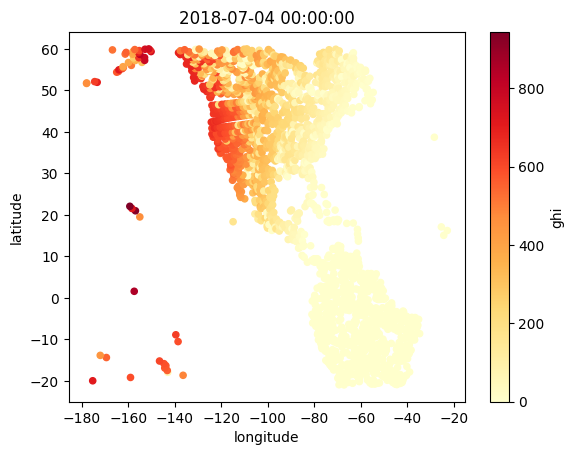

In [94]:
df.plot.scatter(x='longitude', y='latitude', c='ghi',
                colormap='YlOrRd',
                title=str(time_index[timestep]))
plt.show()

In [54]:
# Full resolution subset of California
meta = pd.DataFrame(f['meta'][...])
CA = meta.loc[meta['state'] == b'California'] # Note .h5 saves strings as bit-strings
CA.head()

,latitude,longitude,elevation,timezone,country,state,county,urban,population,landcover
70276,32.529999,-117.099998,55.062500,-8,b'United States',b'California',b'San Diego',b'None',32326,130
70588,32.570000,-117.099998,7.100000,-8,b'United States',b'California',b'San Diego',b'Tijuana',27971,190
70589,32.570000,-117.059998,24.920000,-8,b'United States',b'California',b'San Diego',b'Tijuana',51608,190
70590,32.570000,-117.019997,96.599998,-8,b'United States',b'California',b'San Diego',b'Tijuana',15236,110
70591,32.570000,-116.980003,140.600006,-8,b'United States',b'California',b'San Diego',b'Tijuana',2949,130


In [55]:
%time data = dset[timestep][CA.index]  # full-resolution subset
df = CA[['longitude', 'latitude']].copy()
df['ghi'] = data / dset.attrs['psm_scale_factor']
df.shape

OSError: Error retrieving data: None

ValueError: Length of values (2019) does not match length of index (26010)